In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns, numpy as np
from itertools import cycle, islice

In [2]:
##Loading Data in
import pandas as pd
zillow=pd.read_csv('../Clean_Data/5-3.Combined_zillow_data_with_growthrate.csv',sep=',', encoding='latin-1')

In [3]:
##Getting City Averages for Columns
zillow_gb=zillow.groupby('City').mean()

In [4]:
##Changing data types so they are more  readable 
zillow_gb.zestimate=zillow_gb.zestimate.astype('long')
zillow_gb.valuation_high=zillow_gb.valuation_high.astype('long')
zillow_gb.valuation_low=zillow_gb.valuation_low.astype('long')
zillow_gb['tax assessment']=zillow_gb['tax assessment'].astype('long')
zillow_gb['tax assess year']=zillow_gb['tax assess year'].astype('int')
zillow_gb['lot size']=zillow_gb['lot size'].astype('long')
zillow_gb['finished sq ft']=zillow_gb['finished sq ft'].astype('long')
zillow_gb['year built']=zillow_gb['year built'].astype('long')
zillow_gb.bedrooms=zillow_gb.bedrooms.astype('int')
zillow_gb.bathrooms=zillow_gb.bathrooms.astype('int')

In [5]:
zillow_gb_lat_lng=[['latitude','longitude']]

In [6]:
##Deleting unnecessary columns
del zillow_gb['zpid']
del zillow_gb['latitude']
del zillow_gb['longitude']
del zillow_gb['message_code']

In [7]:
##Calculating some new measures
#Price per Lot Size
zillow_gb['PP_lot']=zillow_gb.zestimate/zillow_gb['lot size']
zillow_gb.PP_lot=zillow_gb.PP_lot.astype('int')
#Price per house size
zillow_gb['PP_sqft']=zillow_gb.zestimate/zillow_gb['finished sq ft']
zillow_gb.PP_sqft=zillow_gb.PP_sqft.astype('int')
zillow_gb

,Unnamed: 0,zestimate,rentzestimate,valuation_high,valuation_low,valuechange,tax assessment,tax assess year,year built,lot size,finished sq ft,bedrooms,bathrooms,Housing Growth,PP_lot,PP_sqft
City,,,,,,,,,,,,,,,,
Alhambra,192.500000,786966,2758.840000,829426,742117,18075.940000,385167,2017,1946,19314,1731,2,2,0.265623,40,454
Burbank,25.500000,1125583,4187.500000,1189356,1060698,11585.269231,552952,2017,1957,39165,2134,3,2,0.132308,28,527
Glendale,85.000000,1137447,3567.292308,1211146,1063506,21903.676923,566964,2017,1946,12030,2093,3,2,0.222126,94,543
Inglewood,142.500000,717422,2734.500000,798782,667456,5637.620000,280203,2017,1949,12584,1964,3,2,0.098407,57,365
Long Beach,245.000000,643798,2456.927273,688384,602054,8054.672727,360702,2017,1940,7511,1704,3,2,0.164882,85,377
Los Angeles,297.271186,770387,2779.017241,826419,721323,8573.293103,264671,2017,1929,14589,1808,3,2,0.160462,52,426
Palmdale,358.500000,332900,2145.796296,351534,314708,2855.890909,231949,2017,1983,18357,1940,3,2,0.114943,18,171
Pasadena,412.000000,1779256,5561.901961,1903052,1652609,4663.000000,773550,2017,1944,24416,5378,3,3,0.110612,72,330
Santa Clarita,464.500000,759555,3511.407407,806203,712300,11370.055556,548975,2017,1980,35783,2401,3,2,0.163195,21,316


In [10]:
##Getting city house prices for box and whisker plots 
zillow_box=zillow[['City','zestimate']]

In [11]:
##Getting city house prices for box and whisker plots 
Glendale=zillow_box[zillow_box['City']=='Glendale']     
Burbank=zillow_box[zillow_box['City']=='Burbank'] 
Inglewood=zillow_box[zillow_box['City']=='Inglewood'] 
Alhambra=zillow_box[zillow_box['City']=='Alhambra'] 
Pasadena=zillow_box[zillow_box['City']=='Pasadena'] 
Long_Beach=zillow_box[zillow_box['City']=='Long Beach'] 
Los_Angeles=zillow_box[zillow_box['City']=='Los Angeles'] 
Palmdale=zillow_box[zillow_box['City']=='Palmdale'] 
Santa_Clarita=zillow_box[zillow_box['City']=='Santa Clarita'] 
Torrance=zillow_box[zillow_box['City']=='Torrance'] 

In [12]:
##Getting city house prices for box and whisker plots 
##Getting only 50 per city the cities dont have matching records 
Glendale=Glendale.sample(n=50)
Burbank=Burbank.sample(n=50)
Inglewood=Inglewood.sample(n=50)
Alhambra=Alhambra.sample(n=50)
Pasadena=Pasadena.sample(n=50)
Long_Beach=Long_Beach.sample(n=50)
Los_Angeles=Los_Angeles.sample(n=50)
Palmdale=Palmdale.sample(n=50)
Santa_Clarita=Santa_Clarita.sample(n=50)
Torrance=Torrance.sample(n=50)

In [13]:
##Getting city house prices for box and whisker plots 
Glendale.columns=['city','Glendal']
Burbank.columns=['city','Burbank']
Inglewood.columns=['city','Inglewood']
Alhambra.columns=['city','Alhambra']
Pasadena.columns=['city','Pasadena']
Long_Beach.columns=['city','Long_Beach']
Los_Angeles.columns=['city','Los_Angeles']
Palmdale.columns=['city','Palmdale']
Santa_Clarita.columns=['city','Santa_Clarita']
Torrance.columns=['city','Torrance']

In [14]:
##Getting city house prices for box and whisker plots 
Glendale=Glendale.reset_index()
Burbank=Burbank.reset_index()
Inglewood=Inglewood.reset_index()
Alhambra=Alhambra.reset_index()
Pasadena=Pasadena.reset_index()
Long_Beach=Long_Beach.reset_index()
Los_Angeles=Los_Angeles.reset_index()
Palmdale=Palmdale.reset_index()
Santa_Clarita=Santa_Clarita.reset_index()
Torrance=Torrance.reset_index()

In [15]:
##Getting city house prices for box and whisker plots 
df=pd.concat([Glendale.Glendal
           ,Burbank.Burbank
           ,Inglewood.Inglewood
           ,Alhambra.Alhambra
           ,Pasadena.Pasadena
           ,Long_Beach.Long_Beach
           ,Los_Angeles.Los_Angeles
           ,Palmdale.Palmdale
           ,Santa_Clarita.Santa_Clarita
           ,Torrance.Torrance],axis=1)

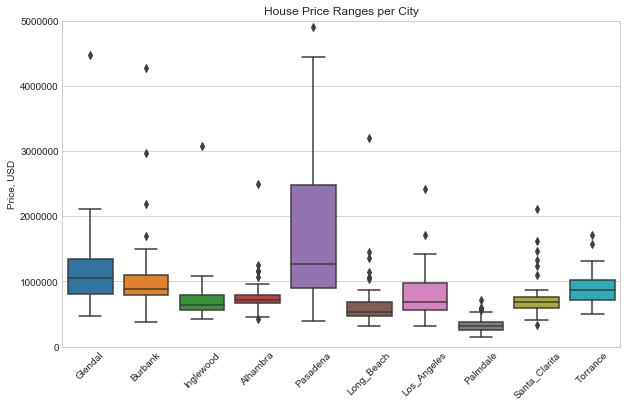

In [27]:
##Drawing the box and whisker plots to see the variances in terms of prices 
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.ylim(0,5000000)
plt.ylabel("Price, USD")
plt.title('House Price Ranges per City')
plt.xticks(rotation=45)
plt.savefig("../Clean_Data/6-2.House_Price_Ranges_per_City.png")
plt.show()

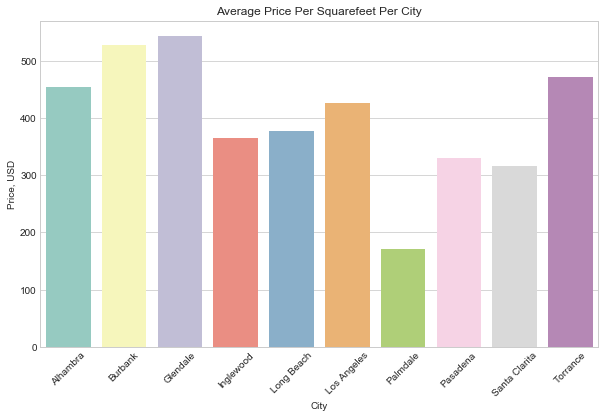

In [28]:
# Drawing out Average Price Per sqft per City
# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=zillow_gb.index, y="PP_sqft", data=zillow_gb, palette=sns.color_palette("Set3", 19))
plt.xticks(rotation=45)
plt.ylabel("Price, USD")
plt.title("Average Price Per Squarefeet Per City")
plt.savefig("../Clean_Data/6-2.Average_Price_Per_Squarefeet_Per_City.png")
plt.show()

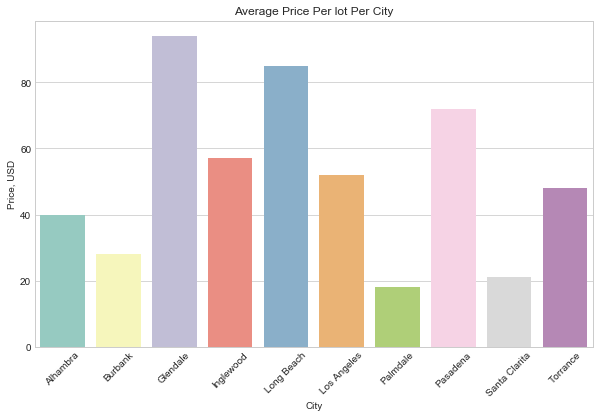

In [29]:
# Drawing out Average Price Per lot per City
# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=zillow_gb.index, y="PP_lot", data=zillow_gb, palette=sns.color_palette("Set3", 19))
plt.xticks(rotation=45)
plt.ylabel("Price, USD")
plt.title("Average Price Per lot Per City")
plt.savefig("../Clean_Data/6-2.Average_Price_Per_lot_Per_City.png")
plt.show()

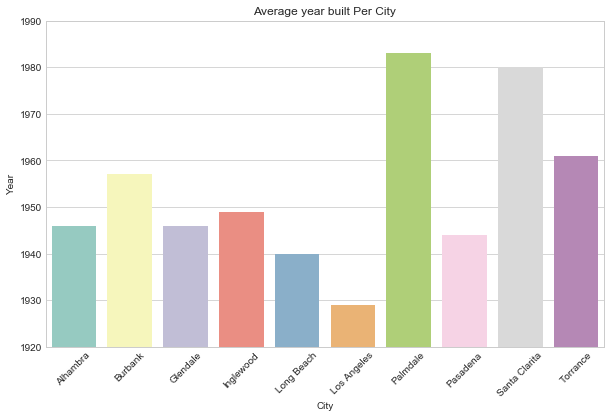

In [30]:
# Drawing out Average year built per City
# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=zillow_gb.index, y="year built", data=zillow_gb, palette=sns.color_palette("Set3", 19))
plt.xticks(rotation=45)
plt.ylim(1920,1990)
plt.ylabel("Year")
plt.title("Average year built Per City")

plt.savefig("../Clean_Data/6-2.Average_year_built_Per_City.png")
plt.show()